<center><h1><b><font size="5">KNN vs Linear Regression: A Linear Problem</font></b></h1></center>

#### Importing the relevant libraries

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

#### Defining the regression 

In [12]:
inputs, target = make_regression(n_samples = 300,
                                 n_features = 1,
                                 noise = 15,
                                 random_state = 365)

In [15]:
target = target/100

#### Visualizing the regression 

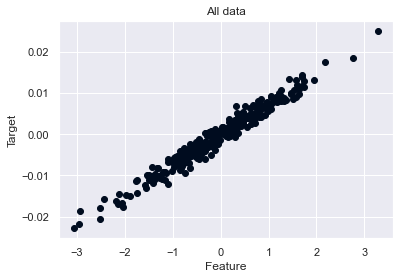

In [16]:
sns.set()

plt.scatter(inputs, target, color = '#000C1F')
plt.title('All data')
plt.xlabel('Feature')
plt.ylabel('Target');

#### Split the data into training and testing sets. Visualize both datasets

In [20]:
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size = 0.20,
                                                    random_state = 365)

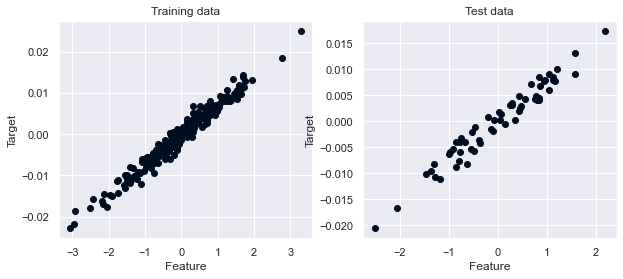

In [24]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.scatter(x_train, y_train, color = '#000C1F')
ax1.set_title('Training data')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.scatter(x_test, y_test, color = '#000C1F')
ax2.set_title('Test data')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target');

plt.show()

#### Fit a linear regression and multiple KNN-regresions

In [26]:
reg_lin = LinearRegression() #instance
reg_lin.fit(x_train, y_train) #fit the model to the traning data
y_pred_lin = reg_lin.predict(x_test) #make prediction on the test data

y_pred_knn = []
for i in [1, 10, 40]: #small_value:10, medium_value:10, large_value:40
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    reg_knn.fit(x_train, y_train)
    y_pred_knn.append(reg_knn.predict(x_test))

#### Sort the data according to the test features

In [27]:
df = pd.DataFrame(data = {'x_test':list(x_test.flatten()),
                          'y_test':list(y_test.flatten()),
                          'y_pred_lin':list(y_pred_lin.flatten()),
                          'y_pred_knn-1':list(y_pred_knn[0].flatten()),
                          'y_pred_knn-10':list(y_pred_knn[1].flatten()),
                          'y_pred_knn-40':list(y_pred_knn[2].flatten())})

df = df.sort_values(by = ['x_test']) # ***

x_test_sorted = df['x_test'].tolist()
y_test_sorted = df['y_test'].tolist()
y_pred_lin_sorted = df['y_pred_lin'].tolist()
y_pred_knn1_sorted = df['y_pred_knn-1'].tolist()
y_pred_knn10_sorted = df['y_pred_knn-10'].tolist()
y_pred_knn40_sorted = df['y_pred_knn-40'].tolist()

#### Visualize the linear regression on top of thje test data

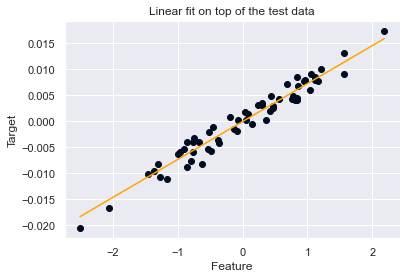

In [28]:
sns.set()

plt.scatter(x_test_sorted,
            y_test_sorted,
            color = '#000C1F')

plt.plot(x_test_sorted,
         y_pred_lin_sorted,
        color = 'orange');

plt.title('Linear fit on top of the test data')
plt.xlabel('Feature')
plt.ylabel('Target');

#### Visualize three KNN regression for K=1, 10 and 40 on top of the test data

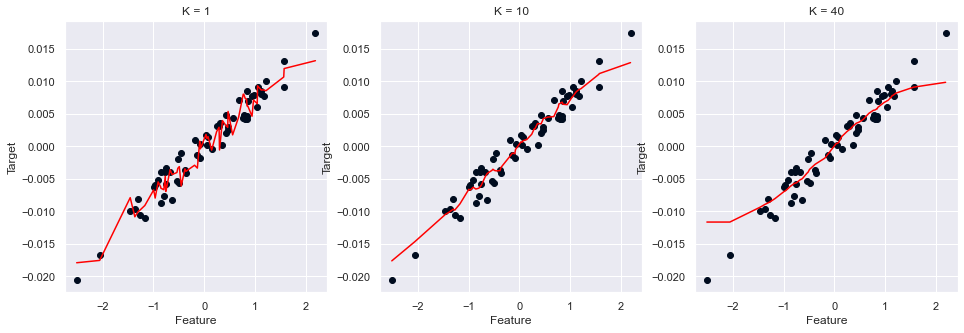

In [30]:
sns.set()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5))

ax1.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax2.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')
ax3.scatter(x_test_sorted, y_test_sorted, color = '#000C1F')

ax1.plot(x_test_sorted,
         y_pred_knn1_sorted,
         color = 'red')
ax1.set_title('K = 1') # overfitting
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')

ax2.plot(x_test_sorted,
         y_pred_knn10_sorted,
         color = 'red')
ax2.set_title('K = 10') #fit
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')

ax3.plot(x_test_sorted,
         y_pred_knn40_sorted,
         color = 'red')
ax3.set_title('K = 40') #overfitting
ax3.set_xlabel('Feature')
ax3.set_ylabel('Target');

#### Plot the MSE versus the number of neighbors


In [31]:
k = 41 # 40 knn values

mse_lin = []
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_lin = [mse_lin]*(k-1)
mse_knn = []

for i in range(1, k):
    reg_knn = KNeighborsRegressor(n_neighbors = i)
    reg_knn.fit(x_train, y_train)
    y_pred_knn = reg_knn.predict(x_test)
    mse_knn.append(mean_squared_error(y_test, y_pred_knn))

#### Plot the MSE versus the number of neighbors

Text(0, 0.5, 'MSE')

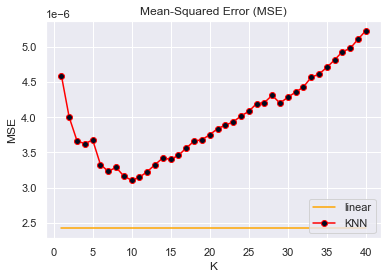

In [32]:
sns.set()

fig, ax = plt.subplots()

ax.plot(list(range(1, k)),
        mse_lin,
        color = 'orange',
        label = 'linear')

ax.plot(list(range(1, k)),
        mse_knn,
        color = 'red',
        marker = 'o',
        markerfacecolor = '#000C1F',
        label = 'KNN')

ax.legend(loc='lower right')
ax.set_title('Mean-Squared Error (MSE)')
ax.set_xlabel('K')
ax.set_ylabel('MSE')

# Non-parametric (KNN) model - not the best option
# Parametric (lienar) model - solve the problem